(3, 432, 432, 432)
rearranging...
done rearranging...
((520, 520, 520), 44)
('label_set before', (520, 520, 520, 3))
('label_set', (432, 432, 432, 3))


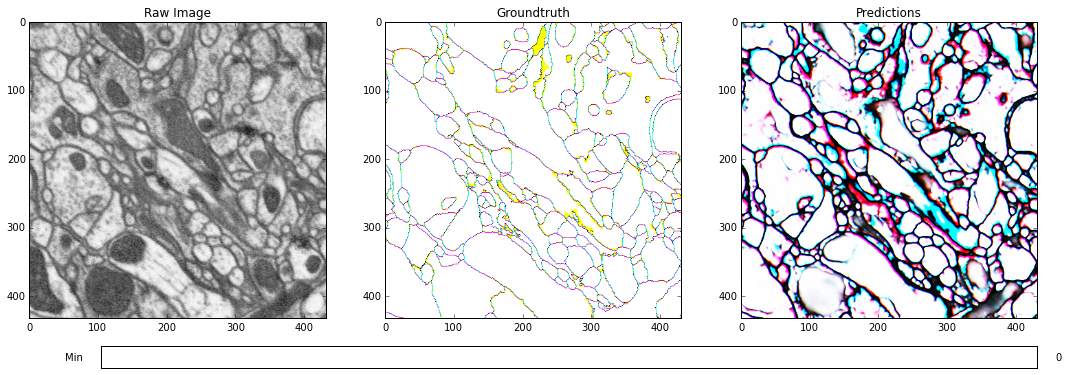

In [6]:
# %matplotlib inline
# These are a set of functions to aid viewing of 3D EM images and their
# associated affinity graphs

import os
import matplotlib.cm as cm
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import h5py
import array

#Displays three images: the raw data, the corresponding labels, and the predictions
def display(raw, label, pred, im_size=250, im2_size=432):
    fig = plt.figure(figsize=(20,10))
    fig.set_facecolor('white')
    ax1,ax2,ax3 = fig.add_subplot(1,3,1),fig.add_subplot(1,3,2),fig.add_subplot(1,3,3)

    fig.subplots_adjust(left=0.2, bottom=0.25)
    depth0 = 0
    zoom0 = 250

    #Image is grayscale
    im1 = ax1.imshow(raw[1,:,:],cmap=cm.Greys_r)
    ax1.set_title('Raw Image')

    im = np.zeros((im_size,im_size,3))
    im[:,:,:]=label[1,:,:,:]
    im2 = ax2.imshow(im)
    ax2.set_title('Groundtruth')

    im_ = np.zeros((im2_size,im2_size,3))
    im_[:,:,:]=pred[1,:,:,:]
    im3 = ax3.imshow(im_)
    ax3.set_title('Predictions')

    axdepth = fig.add_axes([0.25, 0.3, 0.65, 0.03], axisbg='white')
    #axzoom  = fig.add_axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

    depth = Slider(axdepth, 'Min', 0, im_size, valinit=depth0,valfmt='%0.0f')
    #zoom = Slider(axmax, 'Max', 0, 250, valinit=max0)

    def update(val):
        z = int(depth.val)
        im1.set_data(raw[z,:,:])
        im[:,:,:]=label[z,:,:,:]
        im2.set_data(im)
        im_[:,:,:]=pred[z,:,:,:]
        im3.set_data(im_)
        fig.canvas.draw()
    depth.on_changed(update)
    plt.show()


## Just to access the images...

data_folder = 'nobackup/turaga/data/fibsem_medulla_7col/tstvol-520-1-h5/'
os.chdir('/.')

#Open training data
f = h5py.File(data_folder + 'img_normalized.h5', 'r')
data_set = f['main']

#Open training labels
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g['main'],dtype='float32') #3,z,y,x

# preds
hdf5_pred_file = '/tier2/turaga/singhc/train/output_10000/tstvol-1_5.h5' #'/tier2/turaga/turagas/research/pygt_models/fibsem5/test_out_0.h5'
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
aff = np.asarray(hdf5_aff['main'],dtype='float32')
print aff.shape

## do something here
print('rearranging...')
#aff = aff.transpose((0,1,2,3))
# dims = aff.shape
# affFlat = aff.flatten()
# aff = np.reshape(affFlat,dims,order='F')
print('done rearranging...')
##

# transpose so they match image
label_set = np.transpose(label_set,(1,2,3,0))
aff = np.transpose(aff,(1,2,3,0))

# reshape labels, image
gt_data_dimension = label_set.shape[0]
data_dimension = aff.shape[1]
if gt_data_dimension != data_dimension:
    padding = (gt_data_dimension - data_dimension) / 2
    print(data_set.shape,padding)
    data_set = data_set[padding:(-1*padding),padding:(-1*padding),padding:(-1*padding)]
    print("label_set before",label_set.shape)
    label_set = label_set[padding:(-1*padding),padding:(-1*padding),padding:(-1*padding),:]
    print("label_set",label_set.shape)
    #print"New GT data shape :",gt.shape

display(data_set, label_set, aff, im_size=432, im2_size=432)
